## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

## Loading the training and census data for creating the training dataset

In [2]:
train_data = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv')
census_data = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv')

print(len(census_data),len(train_data))

3142 122265


## Converting first day of month to a number

*numMons* is an array containing all the months counting from the minimum date given in the train.csv file 

In [3]:
train_data['numMons'] = " "
min_date = pd.to_datetime(min(train_data['first_day_of_month']))

dates = np.array(train_data['first_day_of_month'])

numMons = (  ( (pd.to_datetime(dates)) \
                                   - ( min_date  ) )/(np.timedelta64(1, 'M'))  ).astype('int')


train_data['numMons'] = numMons

In [4]:
train_data.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,numMons
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,1
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,2
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,3
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,4


## Assigining the sequential number to each county given in train.csv

In [5]:
dict_val = {}
for leng, val in enumerate(train_data.cfips.unique()):
    dict_val[val] = leng

## Looping the dictionary of unique values for county to store in *countyID* array

In [6]:
train_data["countyID"] = " "
countyID = []
for leng, val in enumerate(tqdm(train_data['cfips'])):
    train_data.loc[leng,"countyID"] = dict_val[train_data.loc[leng,'cfips']]
    countyID.append(dict_val[train_data.loc[leng,'cfips']])

100%|██████████| 122265/122265 [05:12<00:00, 391.02it/s]


## Counting the number of entries/data per county

The number is 39 from the below plot

(array([36.5, 37. , 37.5, 38. , 38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

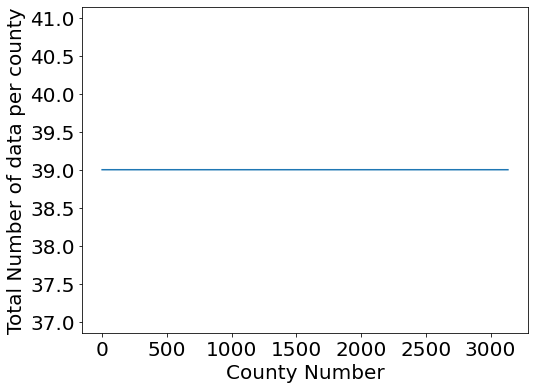

In [7]:
fs = 20
figL=8
figW=6
plt.figure(figsize=(figL,figW))
plt.plot(train_data['countyID'].value_counts())
plt.xlabel('County Number',fontsize=fs)
plt.ylabel('Total Number of data per county',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)


## Plotting the microbusinees density (target value) trend with number of days (from the date 2019-08-01) for a particular county 

Here the county numbers are 0 and 450

In [8]:
dataCounty1 = train_data[train_data['countyID'] == 0]
dataCounty2 = train_data[train_data['countyID'] == 450]

(array([5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

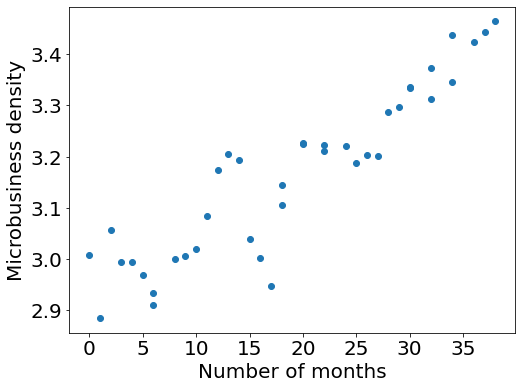

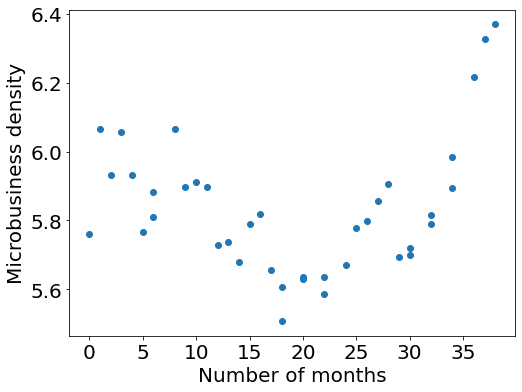

In [9]:
plt.figure(figsize=(figL,figW))
plt.scatter(dataCounty1['numMons'],dataCounty1['microbusiness_density'])
plt.xlabel('Number of months',fontsize=fs)
plt.ylabel('Microbusiness density',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)


plt.figure(figsize=(figL,figW))
plt.scatter(dataCounty2['numMons'],dataCounty2['microbusiness_density'])
plt.xlabel('Number of months',fontsize=fs)
plt.ylabel('Microbusiness density',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

We can see the trend of density increaing for both counties. We can also see the statewise distribution of density.

In [10]:
dataState1 = train_data[train_data['state'] == 'Alabama']
dataState2 = train_data[train_data['state'] == 'Texas']


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

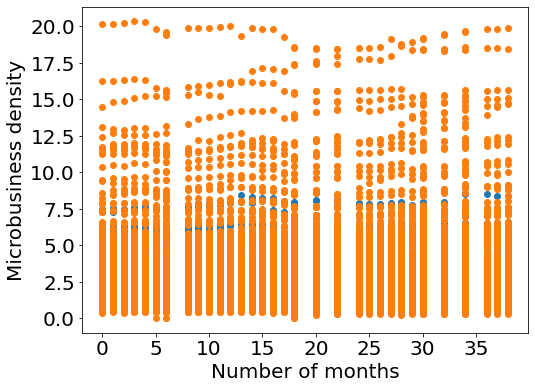

In [11]:
plt.figure(figsize=(figL,figW))
plt.scatter(dataState1['numMons'],dataState1['microbusiness_density'])
plt.scatter(dataState2['numMons'],dataState2['microbusiness_density'])
plt.xlabel('Number of months',fontsize=fs)
plt.ylabel('Microbusiness density',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

The density distributions for the states Alabama & Texas look messy due to all the counties but we can see the clear difference between the margin between these two states.

## Is the census_starter.csv data useful?

In [12]:
census_data.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


### Plotting the percent of houshold with the access of broadband from 2017 to 2021 (only first 30 counties).

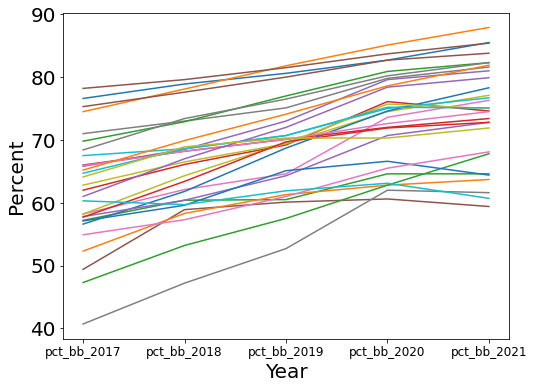

In [13]:
plt.figure(figsize=(figL,figW))
plt.xlabel('Year',fontsize=fs)
plt.ylabel('Percent',fontsize=fs)
plt.xticks(fontsize=fs-8)
plt.yticks(fontsize=fs)

for i in range(30):
    
    plt.plot(census_data.iloc[i,:5])
   
    

This trend is increasing.

### Plotting the percent of houshold born outside of the US from 2017 to 2021 (only first 30 counties).

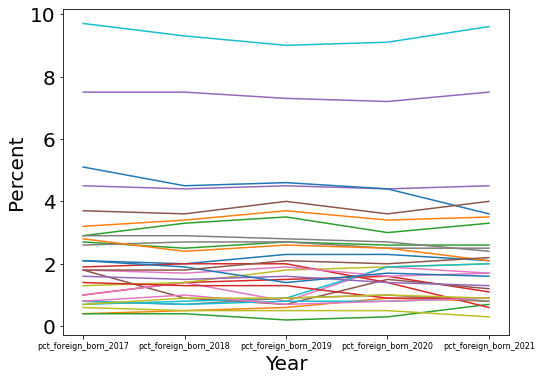

In [14]:
plt.figure(figsize=(figL,figW))
plt.xlabel('Year',fontsize=fs)
plt.ylabel('Percent',fontsize=fs)
plt.xticks(fontsize=fs-12)
plt.yticks(fontsize=fs)

for i in range(30):
    
    plt.plot(census_data.iloc[i,11:16])
   
    

All the percent values are almost constant.

### Plotting the percent of population with 4yr degree from 2017 to 2021 (only first 30 counties).

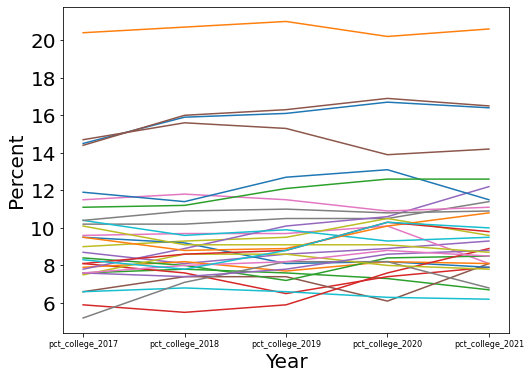

In [15]:
plt.figure(figsize=(figL,figW))
plt.xlabel('Year',fontsize=fs)
plt.ylabel('Percent',fontsize=fs)
plt.xticks(fontsize=fs-12)
plt.yticks(fontsize=fs)

for i in range(30):
    
    plt.plot(census_data.iloc[i,6:11])
   
    

The census data can be useful and added to the training and testing data.

## Adding the census data to the training data

### Normalizing the each category of data to make the data uniform for training

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#data for broadband access
census_data.iloc[:,0:5]=scaler.fit_transform(census_data.iloc[:,0:5].to_numpy())

#population percent of 4yr degree
census_data.iloc[:,6:11]=scaler.fit_transform(census_data.iloc[:,6:11].to_numpy())

#percent of born outside of the US
census_data.iloc[:,11:16]=scaler.fit_transform(census_data.iloc[:,11:16].to_numpy())

#percent of IT workers
census_data.iloc[:,16:21]=scaler.fit_transform(census_data.iloc[:,16:21].to_numpy())

#income level
census_data.iloc[:,21:26]=scaler.fit_transform(census_data.iloc[:,21:26].to_numpy())

## Merging census and training data

In training data, we have data from 2019 to 2022 while census data is from 2017 to 2021. It lags two years. Thus, here I have assigned the 2018 entry data in census to the training data of 2019. Similarly, 2019 census to 2020 training. Thus, we don't need 2017 data for our training set.

Adding the necessary columns.

In [17]:
train_data["pct_bb"] = " "
train_data["pct_college"] = " "
train_data["pct_foreign_born"] = " "
train_data["pct_it_workers"] = " "
train_data["median_hh_inc"] = " "


Defining the function to transfer census data of previous year to the training data.

In [18]:
def census_to_train(row,idNum,dataset):
    row=row
    idNum = idNum
    year=pd.to_datetime(train_data['first_day_of_month'][row]).year - 2
    temp_cen_data = pd.DataFrame(census_data[census_data['cfips'] == idNum])
    
    dataset.loc[row,"pct_bb"] = float(temp_cen_data["pct_bb_" + str(year)])
    dataset.loc[row,"pct_college"] = float(temp_cen_data["pct_college_"+ str(year)])
    dataset.loc[row,"pct_foreign_born"] = float(temp_cen_data["pct_foreign_born_"+ str(year)])
    dataset.loc[row,"pct_it_workers"] = float(temp_cen_data["pct_it_workers_"+ str(year)])
    dataset.loc[row,"median_hh_inc"] = float(temp_cen_data["median_hh_inc_"+ str(year)])


Storing the values in the training data.

In [19]:
for row, idNum in enumerate(tqdm(train_data['cfips'])):
    census_to_train(row,idNum,train_data)

100%|██████████| 122265/122265 [43:57<00:00, 46.36it/s]


In [20]:
train_data.to_csv('/kaggle/working/training_data.csv')

## Combining all the processing into a function for data featuring (both test and train dataset)

In [21]:
train_data = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv')
test_data = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv')
census_data = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv')

min_date = pd.to_datetime(min(train_data['first_day_of_month']))


dict_val = {}
for leng, val in enumerate(train_data.cfips.unique()):
    dict_val[val] = leng
    

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#data for broadband access
census_data.iloc[:,0:5]=scaler.fit_transform(census_data.iloc[:,0:5].to_numpy())

#population percent of 4yr degree
census_data.iloc[:,6:11]=scaler.fit_transform(census_data.iloc[:,6:11].to_numpy())

#percent of born outside of the US
census_data.iloc[:,11:16]=scaler.fit_transform(census_data.iloc[:,11:16].to_numpy())

#percent of IT workers
census_data.iloc[:,16:21]=scaler.fit_transform(census_data.iloc[:,16:21].to_numpy())

#income level
census_data.iloc[:,21:26]=scaler.fit_transform(census_data.iloc[:,21:26].to_numpy())

def census_to_train(row,idNum,dataset):
    row=row
    idNum = idNum
    year=pd.to_datetime(train_data['first_day_of_month'][row]).year - 2
    temp_cen_data = pd.DataFrame(census_data[census_data['cfips'] == idNum])
    
    dataset.loc[row,"pct_bb"] = float(temp_cen_data["pct_bb_" + str(year)])
    dataset.loc[row,"pct_college"] = float(temp_cen_data["pct_college_"+ str(year)])
    dataset.loc[row,"pct_foreign_born"] = float(temp_cen_data["pct_foreign_born_"+ str(year)])
    dataset.loc[row,"pct_it_workers"] = float(temp_cen_data["pct_it_workers_"+ str(year)])
    dataset.loc[row,"median_hh_inc"] = float(temp_cen_data["median_hh_inc_"+ str(year)])


def init_to_feature(dataset):
    dataset['numMons'] = " "
    dates = np.array(dataset['first_day_of_month'])

    numMons = (  ( (pd.to_datetime(dates)) \
                                   - ( min_date  ) )/(np.timedelta64(1, 'M'))  ).astype('int')
    dataset['numMons'] = numMons
    
    
    
    dataset["countyID"] = " "
    for leng, val in enumerate(tqdm(dataset['cfips'])):
        dataset.loc[leng,"countyID"] = dict_val[dataset.loc[leng,'cfips']]
       
    
    dataset["pct_bb"] = " "
    dataset["pct_college"] = " "
    dataset["pct_foreign_born"] = " "
    dataset["pct_it_workers"] = " "
    dataset["median_hh_inc"] = " "

    
    
    for row, idNum in enumerate(tqdm(dataset['cfips'])):
        census_to_train(row,idNum,dataset)
    
    
    features = np.array(dataset[['countyID','numMons','pct_bb','pct_college',\
                               'pct_foreign_born','pct_it_workers','median_hh_inc']])
    
    return features


### Defining the training and test data

In [22]:
test_features = init_to_feature(test_data)

train_features = init_to_feature(train_data)
training_target = np.array(train_data[['microbusiness_density']])

100%|██████████| 122265/122265 [45:00<00:00, 45.28it/s]
